In [1]:
import warnings
warnings.filterwarnings('ignore')

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
response_API = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
data = response_API.text
parse_json = json.loads(data)
parse_json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [4]:
events = pd.DataFrame.from_dict(parse_json['events'])
events.head(30)

,id,name,deadline_time,release_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,ranked_count,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2023-08-11T17:30:00Z,None,64,True,True,3383750.0,1691775000,0,127.0,False,False,False,False,False,0,"[{'chip_name': 'bboost', 'num_played': 163222}...",355.0,1.0,395.0,"{'id': 395, 'points': 14}",0,355.0,19.0
1,2,Gameweek 2,2023-08-18T17:15:00Z,None,44,True,True,3338487.0,1692378900,0,120.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 126778}...",355.0,195.0,108.0,"{'id': 108, 'points': 16}",13130353,355.0,19.0
2,3,Gameweek 3,2023-08-25T17:30:00Z,None,44,True,True,9368956.0,1692984600,0,128.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 124110}...",355.0,108.0,216.0,"{'id': 216, 'points': 19}",17619532,355.0,19.0
3,4,Gameweek 4,2023-09-01T17:30:00Z,None,72,True,True,4354697.0,1693589400,0,148.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 109196}...",355.0,216.0,516.0,"{'id': 516, 'points': 20}",16035365,355.0,19.0
4,5,Gameweek 5,2023-09-16T10:00:00Z,None,44,True,True,6211182.0,1694858400,0,102.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 96469},...",355.0,516.0,344.0,"{'id': 344, 'points': 13}",14363988,355.0,19.0
5,6,Gameweek 6,2023-09-23T12:30:00Z,None,68,True,True,4494759.0,1695472200,0,142.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 78528},...",355.0,343.0,430.0,"{'id': 430, 'points': 18}",12109066,355.0,308.0
6,7,Gameweek 7,2023-09-30T10:00:00Z,None,49,True,True,9335002.0,1696068000,0,156.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 79672},...",355.0,430.0,60.0,"{'id': 60, 'points': 23}",15579302,355.0,308.0
7,8,Gameweek 8,2023-10-07T10:00:00Z,None,44,True,True,10068163.0,1696672800,0,120.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 53401},...",355.0,516.0,216.0,"{'id': 216, 'points': 16}",19444885,355.0,355.0
8,9,Gameweek 9,2023-10-21T10:00:00Z,None,67,True,True,6931177.0,1697882400,0,152.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 50175},...",355.0,60.0,423.0,"{'id': 423, 'points': 17}",11431916,355.0,308.0
9,10,Gameweek 10,2023-10-27T17:30:00Z,None,66,True,True,9895223.0,1698427800,0,134.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 80903},...",355.0,60.0,13.0,"{'id': 13, 'points': 17}",12428517,355.0,355.0


In [5]:
parse_json['game_settings']

{'league_join_private_max': 30,
 'league_join_public_max': 5,
 'league_max_size_public_classic': 20,
 'league_max_size_public_h2h': 16,
 'league_max_size_private_h2h': 16,
 'league_max_ko_rounds_private_h2h': 3,
 'league_prefix_public': 'League',
 'league_points_h2h_win': 3,
 'league_points_h2h_lose': 0,
 'league_points_h2h_draw': 1,
 'league_ko_first_instead_of_random': False,
 'cup_start_event_id': None,
 'cup_stop_event_id': None,
 'cup_qualifying_method': None,
 'cup_type': None,
 'featured_entries': [],
 'percentile_ranks': [1,
  5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  95,
  90,
  95],
 'squad_squadplay': 11,
 'squad_squadsize': 15,
 'squad_team_limit': 3,
 'squad_total_spend': 1000,
 'ui_currency_multiplier': 10,
 'ui_use_special_shirts': False,
 'ui_special_shirt_exclusions': [],
 'stats_form_days': 30,
 'sys_vice_captain_enabled': True,
 'transfers_cap': 20,
 'transfers_sell_on_fee': 0.5,
 'league_h2h_tiebreak_stats': ['+go

In [6]:
parse_json['phases']

[{'id': 1, 'name': 'Overall', 'start_event': 1, 'stop_event': 38},
 {'id': 2, 'name': 'August', 'start_event': 1, 'stop_event': 3},
 {'id': 3, 'name': 'September', 'start_event': 4, 'stop_event': 7},
 {'id': 4, 'name': 'October', 'start_event': 8, 'stop_event': 10},
 {'id': 5, 'name': 'November', 'start_event': 11, 'stop_event': 13},
 {'id': 6, 'name': 'December', 'start_event': 14, 'stop_event': 20},
 {'id': 7, 'name': 'January', 'start_event': 21, 'stop_event': 22},
 {'id': 8, 'name': 'February', 'start_event': 23, 'stop_event': 26},
 {'id': 9, 'name': 'March', 'start_event': 27, 'stop_event': 30},
 {'id': 10, 'name': 'April', 'start_event': 31, 'stop_event': 35},
 {'id': 11, 'name': 'May', 'start_event': 36, 'stop_event': 38}]

In [7]:
teams = pd.DataFrame.from_dict(parse_json['teams'])
teams.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1220,1260,1270,1280,1170,1240,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1130,1235,1120,1220,1130,1250,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,3,None,False,0,1095,1100,1070,1120,1130,1110,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1120,1155,1120,1130,1120,1180,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1130,1185,1100,1120,1160,1250,131


In [8]:
parse_json['total_players']

10716756

In [9]:
elements = pd.DataFrame.from_dict(parse_json['elements'])
elements.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,0.0,0.0,232223,0,0,-1,1,0,4,0.0,0.0,0,Folarin,0.0,1,False,Transferred to Monaco,2023-08-31T08:55:15.272751Z,44,232223.jpg,0.0,Balogun,0.2,False,None,u,1,3,0,10024,0,63103,57,0.0,0.0,Balogun,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,672,67,665,69,637,65,676,70,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,552,101,595,53,684,73,335,53,0.00,0.00
1,NaN,NaN,58822,-1,1,-2,2,0,2,1.5,0.5,0,Cédric,0.5,2,False,,None,38,58822.jpg,1.0,Alves Soares,0.4,False,None,a,1,3,2,38407,1380,47138,520,0.1,0.5,Cédric,34,0,0,0,0,0,0,0,0,0,0,0,6,1.0,2.0,0.0,0.3,0,0.00,0.01,0.01,0.28,515,185,457,167,465,168,513,183,NaN,,NaN,,NaN,,0.00,0.0,0.03,0.03,0.74,0.00,822,262,306,104,432,150,262,99,0.00,0.00
2,100.0,100.0,153256,0,0,-1,1,0,3,1.5,0.5,1,Mohamed,0.5,3,False,,2023-12-30T22:30:09.113694Z,44,153256.jpg,2.0,Elneny,0.1,False,None,a,1,3,6,13274,47,19827,78,0.1,1.4,M.Elneny,25,0,1,0,0,0,0,0,0,0,0,0,16,4.0,2.1,10.0,1.6,0,0.08,0.01,0.09,0.13,495,222,455,223,423,210,491,223,NaN,,NaN,,NaN,,0.29,0.0,0.04,0.33,0.47,0.00,525,309,317,146,297,126,468,157,0.00,0.00
3,100.0,100.0,438098,0,0,-1,1,0,3,1.0,0.0,0,Fábio,0.0,4,False,,2023-12-07T12:00:08.489004Z,54,438098.jpg,2.6,Ferreira Vieira,0.1,False,None,a,1,3,21,11546,19,18877,25,0.0,3.9,Fábio Vieira,236,1,3,1,2,0,0,0,0,1,0,0,62,79.4,63.6,77.0,21.9,2,1.20,0.35,1.55,1.48,365,155,311,168,252,133,355,159,NaN,,NaN,,4.0,,0.46,0.0,0.13,0.59,0.56,0.76,125,77,801,346,216,91,447,148,0.76,0.38
4,100.0,100.0,226597,1,-1,3,-3,3,2,5.8,4.8,2,Gabriel,4.8,5,False,,2024-01-20T15:30:09.437664Z,53,226597.jpg,4.0,dos Santos Magalhães,26.1,False,None,a,1,3,96,2595063,103831,2809417,11655,0.9,18.1,Gabriel,1994,3,1,8,20,1,0,0,2,0,0,6,435,503.0,93.5,289.0,88.7,22,3.11,0.45,3.56,16.51,50,15,261,74,85,4,107,19,NaN,,NaN,,NaN,,0.14,0.0,0.02,0.16,0.75,0.90,146,15,39,7,49,7,10,3,0.99,0.36


In [10]:
elements = elements.set_index('id')

In [11]:
parse_json['element_stats']

[{'label': 'Minutes played', 'name': 'minutes'},
 {'label': 'Goals scored', 'name': 'goals_scored'},
 {'label': 'Assists', 'name': 'assists'},
 {'label': 'Clean sheets', 'name': 'clean_sheets'},
 {'label': 'Goals conceded', 'name': 'goals_conceded'},
 {'label': 'Own goals', 'name': 'own_goals'},
 {'label': 'Penalties saved', 'name': 'penalties_saved'},
 {'label': 'Penalties missed', 'name': 'penalties_missed'},
 {'label': 'Yellow cards', 'name': 'yellow_cards'},
 {'label': 'Red cards', 'name': 'red_cards'},
 {'label': 'Saves', 'name': 'saves'},
 {'label': 'Bonus', 'name': 'bonus'},
 {'label': 'Bonus Points System', 'name': 'bps'},
 {'label': 'Influence', 'name': 'influence'},
 {'label': 'Creativity', 'name': 'creativity'},
 {'label': 'Threat', 'name': 'threat'},
 {'label': 'ICT Index', 'name': 'ict_index'},
 {'label': 'Game(s) Started', 'name': 'starts'},
 {'label': 'Expected Goals', 'name': 'expected_goals'},
 {'label': 'Expected Assists', 'name': 'expected_assists'},
 {'label': 'Expe

In [12]:
parse_json['element_types']

[{'id': 1,
  'plural_name': 'Goalkeepers',
  'plural_name_short': 'GKP',
  'singular_name': 'Goalkeeper',
  'singular_name_short': 'GKP',
  'squad_select': 2,
  'squad_min_play': 1,
  'squad_max_play': 1,
  'ui_shirt_specific': True,
  'sub_positions_locked': [12],
  'element_count': 94},
 {'id': 2,
  'plural_name': 'Defenders',
  'plural_name_short': 'DEF',
  'singular_name': 'Defender',
  'singular_name_short': 'DEF',
  'squad_select': 5,
  'squad_min_play': 3,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 266},
 {'id': 3,
  'plural_name': 'Midfielders',
  'plural_name_short': 'MID',
  'singular_name': 'Midfielder',
  'singular_name_short': 'MID',
  'squad_select': 5,
  'squad_min_play': 2,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 360},
 {'id': 4,
  'plural_name': 'Forwards',
  'plural_name_short': 'FWD',
  'singular_name': 'Forward',
  'singular_name_short': 'FWD',
  

# New API Discovered
https://fantasy.premierleague.com/api/leagues-classic/314/standings/?page_new_entries=1&page_standings=1&phase=1

this api return the managers rank and data to help us to study pro managers behavior.

In [13]:
standings = pd.DataFrame()

In [14]:
for i in range(1,21):
    response_API = requests.get('https://fantasy.premierleague.com/api/leagues-classic/314/standings/?page_new_entries=1&page_standings='+str(i)+'&phase=1')
    #print(response_API.status_code)
    data = response_API.text
    parse_json = json.loads(data)
    if standings.empty:
        standings = pd.DataFrame.from_dict(parse_json['standings']['results'])
    else:
        standings = pd.concat([standings,pd.DataFrame.from_dict(parse_json['standings']['results'])])

In [15]:
standings.shape

(1000, 9)

In [16]:
standings.head()

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,157281,50,Sundeep Jaswal,1,1,1,1813,27371,Alexandra Greats
1,20946008,82,Tom Hadley,2,10,2,1797,3052755,One size Fitz Hall
2,24485,65,Ross M,3,4,3,1791,4949,Return of the Mac
3,33294,93,Simon Minting,4,31,4,1791,6690,Mint Ings FC
4,21047874,79,Erik Berthagen,5,15,5,1791,3065913,Jack Grälisch


In [17]:
standings.describe()

,id,event_total,rank,last_rank,rank_sort,total,entry
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03
mean,1.584800e+07,63.822000,498.342000,777.198000,500.500000,1721.38400,2.124057e+06
std,1.827999e+07,10.360195,287.580096,839.750256,288.819436,15.66301,2.246545e+06
min,1.990000e+02,37.000000,1.000000,1.000000,1.000000,1706.00000,4.000000e+01
25%,1.409436e+06,56.000000,250.000000,250.500000,250.750000,1710.00000,2.353910e+05
50%,7.788525e+06,63.000000,500.000000,534.000000,500.500000,1716.00000,1.219596e+06
75%,2.442089e+07,71.000000,749.000000,981.000000,750.250000,1728.00000,3.497913e+06
max,6.806322e+07,100.000000,994.000000,9145.000000,1000.000000,1813.00000,8.013302e+06


<AxesSubplot:>

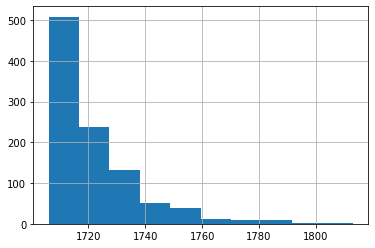

In [18]:
standings['total'].hist()

<AxesSubplot:>

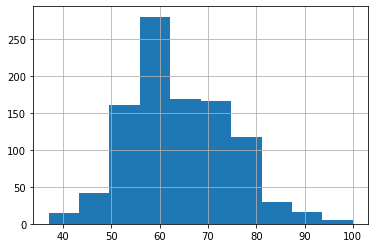

In [19]:
standings['event_total'].hist()

# This API give you detailed pickup for specific manager in specific gameweek
https://fantasy.premierleague.com/api/entry/[team-id]/event/[GW]/picks/

In [20]:
def get_pickups_for_top_managers(gw_number, top_managers_ids):
    picks_for_top_1000_manager_list = []
    i=1
    for entry in top_managers_ids:
        response_API = requests.get('https://fantasy.premierleague.com/api/entry/'+str(entry)+'/event/'+str(gw_number)+'/picks/')
        #print(response_API.status_code)
        data = response_API.text
        parse_json = json.loads(data)
        '''if picks_for_top_1000_manager.empty:
            picks_for_top_1000_manager = pd.DataFrame.from_dict(parse_json['picks'])
        else:
            picks_for_top_1000_manager = pd.concat([picks_for_top_1000_manager,pd.DataFrame.from_dict(parse_json['picks'])])
        '''

        picks_for_top_1000_manager_list+=parse_json['picks']
        print("Completed: {:.2f}%".format((i/1000)*100), end='\r')
        i+=1
    picks_for_top_1000_manager = pd.DataFrame(picks_for_top_1000_manager_list)
    return picks_for_top_1000_manager

In [21]:
gw_number = events['id'].iloc[events[events['is_current'] == True].index[0]]
picks_for_top_1000_manager = get_pickups_for_top_managers(gw_number,standings['entry'])
picks_for_top_1000_manager.shape

(15000, 5)

In [22]:
picks_for_top_1000_manager.head()

,element,position,multiplier,is_captain,is_vice_captain
0,113,1,1,False,False
1,369,2,1,False,False
2,5,3,1,False,False
3,32,4,1,False,False
4,412,5,1,False,False


In [23]:
picks_for_top_1000_manager.to_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')

In [24]:
print('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')
picks_for_top_1000_manager= pd.read_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')

GW26_picks_for_top_1000_manager.csv


In [25]:
picks_for_top_1000_manager['element'] = picks_for_top_1000_manager['element'].astype("category")
picks_for_top_1000_manager.describe(include='all')

,Unnamed: 0,element,position,multiplier,is_captain,is_vice_captain
count,15000.000000,15000.0,15000.000000,15000.000000,15000,15000
unique,NaN,187.0,NaN,NaN,2,2
top,NaN,355.0,NaN,NaN,False,False
freq,NaN,994.0,NaN,NaN,14000,14000
mean,7499.500000,NaN,8.000000,0.800000,NaN,NaN
std,4330.271354,NaN,4.320638,0.541621,NaN,NaN
min,0.000000,NaN,1.000000,0.000000,NaN,NaN
25%,3749.750000,NaN,4.000000,0.000000,NaN,NaN
50%,7499.500000,NaN,8.000000,1.000000,NaN,NaN
75%,11249.250000,NaN,12.000000,1.000000,NaN,NaN


In [26]:
picks_for_top_100_manager = picks_for_top_1000_manager.head(1500)
picks_for_top_100_manager.describe(include = 'all')

,Unnamed: 0,element,position,multiplier,is_captain,is_vice_captain
count,1500.000000,1500.0,1500.000000,1500.000000,1500,1500
unique,NaN,115.0,NaN,NaN,2,2
top,NaN,19.0,NaN,NaN,False,False
freq,NaN,100.0,NaN,NaN,1400,1400
mean,749.500000,NaN,8.000000,0.800000,NaN,NaN
std,433.157015,NaN,4.321935,0.541783,NaN,NaN
min,0.000000,NaN,1.000000,0.000000,NaN,NaN
25%,374.750000,NaN,4.000000,0.000000,NaN,NaN
50%,749.500000,NaN,8.000000,1.000000,NaN,NaN
75%,1124.250000,NaN,12.000000,1.000000,NaN,NaN


In [27]:
players_pick_count_for_top_1000_manager = picks_for_top_1000_manager['element'].value_counts().reset_index().rename(columns={'index':'player_id','element':'count'})
players_pick_count_for_top_1000_manager.describe()

,count
count,187.000000
mean,80.213904
std,180.718183
min,1.000000
25%,2.000000
50%,11.000000
75%,55.500000
max,994.000000


In [28]:
players_pick_count_for_top_100_manager = picks_for_top_100_manager['element'].value_counts().reset_index().rename(columns={'index':'player_id','element':'count'})
players_pick_count_for_top_100_manager = players_pick_count_for_top_100_manager[players_pick_count_for_top_100_manager['count']>0]
players_pick_count_for_top_100_manager.shape

(115, 2)

In [29]:
players_pick_count_for_top_1000_manager['percentage_over_1000'] = (players_pick_count_for_top_1000_manager['count']/1000)*100

In [30]:
players_pick_count_for_top_1000_manager.describe()

,count,percentage_over_1000
count,187.000000,187.000000
mean,80.213904,8.021390
std,180.718183,18.071818
min,1.000000,0.100000
25%,2.000000,0.200000
50%,11.000000,1.100000
75%,55.500000,5.550000
max,994.000000,99.400000


In [31]:
players_pick_count_for_top_100_manager['percentage_over_100'] = (players_pick_count_for_top_100_manager['count']/100)*100

In [32]:
players_pick_count_for_top_100_manager.describe()

,count,percentage_over_100
count,115.000000,115.000000
mean,13.043478,13.043478
std,21.721681,21.721681
min,1.000000,1.000000
25%,1.000000,1.000000
50%,4.000000,4.000000
75%,13.000000,13.000000
max,100.000000,100.000000


In [33]:
players_pick_count_for_top_1000_manager.head(20)

,player_id,count,percentage_over_1000
0,355,994,99.4
1,19,976,97.6
2,60,970,97.0
3,353,902,90.2
4,5,802,80.2
5,524,652,65.2
6,362,626,62.6
7,85,620,62.0
8,557,518,51.8
9,409,463,46.3


In [34]:
players_pick_count_for_top_1000_manager = players_pick_count_for_top_1000_manager.set_index('player_id')

In [35]:
players_pick_count_for_top_1000_manager.index

CategoricalIndex([355,  19,  60, 353,   5, 524, 362,  85, 557, 409,
                  ...
                  378, 392, 395, 415, 490, 498, 504, 511, 513, 792],
                 categories=[5, 8, 10, 12, 14, 19, 20, 23, ...], ordered=False, dtype='category', name='player_id', length=187)

In [36]:
players_pick_count_for_top_100_manager = players_pick_count_for_top_100_manager.set_index('player_id')

In [37]:
players_pick_count_for_top_100_manager.index

CategoricalIndex([ 19, 355,  60, 353,   5,  85, 557, 524, 362, 369,
                  ...
                  572, 341, 279, 678, 316, 314, 298, 569, 290, 112],
                 categories=[5, 8, 10, 12, 14, 19, 20, 23, ...], ordered=False, dtype='category', name='player_id', length=115)

In [38]:
top=[]
for player_id in players_pick_count_for_top_1000_manager.index:
    top.append({'id':player_id, 'name':elements.loc[player_id]['web_name'],'element_type':elements.loc[player_id]['element_type'], 'top_1000_owned_percentage':players_pick_count_for_top_1000_manager.loc[player_id]['percentage_over_1000'],'overall_owned_percentage':elements.loc[player_id]['selected_by_percent']})
top

[{'id': 355,
  'name': 'Haaland',
  'element_type': 4,
  'top_1000_owned_percentage': 99.4,
  'overall_owned_percentage': '76.0'},
 {'id': 19,
  'name': 'Saka',
  'element_type': 3,
  'top_1000_owned_percentage': 97.6,
  'overall_owned_percentage': '65.1'},
 {'id': 60,
  'name': 'Watkins',
  'element_type': 4,
  'top_1000_owned_percentage': 97.0,
  'overall_owned_percentage': '54.1'},
 {'id': 353,
  'name': 'Foden',
  'element_type': 3,
  'top_1000_owned_percentage': 90.2,
  'overall_owned_percentage': '33.1'},
 {'id': 5,
  'name': 'Gabriel',
  'element_type': 2,
  'top_1000_owned_percentage': 80.2,
  'overall_owned_percentage': '26.1'},
 {'id': 524,
  'name': 'Areola',
  'element_type': 1,
  'top_1000_owned_percentage': 65.2,
  'overall_owned_percentage': '35.4'},
 {'id': 362,
  'name': 'Palmer',
  'element_type': 3,
  'top_1000_owned_percentage': 62.6,
  'overall_owned_percentage': '34.1'},
 {'id': 85,
  'name': 'Solanke',
  'element_type': 4,
  'top_1000_owned_percentage': 62.0,
  '

In [39]:
top_owned_players_for_top_1000_manager = pd.DataFrame.from_dict(top)
top_owned_players_for_top_1000_manager.head(15)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
0,355,Haaland,4,99.4,76.0
1,19,Saka,3,97.6,65.1
2,60,Watkins,4,97.0,54.1
3,353,Foden,3,90.2,33.1
4,5,Gabriel,2,80.2,26.1
5,524,Areola,1,65.2,35.4
6,362,Palmer,3,62.6,34.1
7,85,Solanke,4,62.0,24.5
8,557,Hee Chan,3,51.8,8.2
9,409,Dubravka,1,46.3,8.5


In [40]:
top=[]
for player_id in players_pick_count_for_top_100_manager.index:
    top.append({'id':player_id, 'name':elements.loc[player_id]['web_name'],'element_type':elements.loc[player_id]['element_type'], 'top_100_owned_percentage':players_pick_count_for_top_100_manager.loc[player_id]['percentage_over_100'],'overall_owned_percentage':elements.loc[player_id]['selected_by_percent']})
top

[{'id': 19,
  'name': 'Saka',
  'element_type': 3,
  'top_100_owned_percentage': 100.0,
  'overall_owned_percentage': '65.1'},
 {'id': 355,
  'name': 'Haaland',
  'element_type': 4,
  'top_100_owned_percentage': 100.0,
  'overall_owned_percentage': '76.0'},
 {'id': 60,
  'name': 'Watkins',
  'element_type': 4,
  'top_100_owned_percentage': 96.0,
  'overall_owned_percentage': '54.1'},
 {'id': 353,
  'name': 'Foden',
  'element_type': 3,
  'top_100_owned_percentage': 89.0,
  'overall_owned_percentage': '33.1'},
 {'id': 5,
  'name': 'Gabriel',
  'element_type': 2,
  'top_100_owned_percentage': 85.0,
  'overall_owned_percentage': '26.1'},
 {'id': 85,
  'name': 'Solanke',
  'element_type': 4,
  'top_100_owned_percentage': 68.0,
  'overall_owned_percentage': '24.5'},
 {'id': 557,
  'name': 'Hee Chan',
  'element_type': 3,
  'top_100_owned_percentage': 64.0,
  'overall_owned_percentage': '8.2'},
 {'id': 524,
  'name': 'Areola',
  'element_type': 1,
  'top_100_owned_percentage': 56.00000000000

In [41]:
top_owned_players_for_top_100_manager = pd.DataFrame.from_dict(top)
top_owned_players_for_top_100_manager.head(15)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
0,19,Saka,3,100.0,65.1
1,355,Haaland,4,100.0,76.0
2,60,Watkins,4,96.0,54.1
3,353,Foden,3,89.0,33.1
4,5,Gabriel,2,85.0,26.1
5,85,Solanke,4,68.0,24.5
6,557,Hee Chan,3,64.0,8.2
7,524,Areola,1,56.0,35.4
8,362,Palmer,3,55.0,34.1
9,369,Walker,2,42.0,17.3


In [42]:
top_owned_GK_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==1]
top_owned_GK_for_top_1000_manager.shape

(28, 5)

In [43]:
top_owned_GK_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==1]
top_owned_GK_for_top_100_manager.shape

(19, 5)

In [44]:
top_owned_GK_for_top_1000_manager

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
5,524,Areola,1,65.2,35.4
9,409,Dubravka,1,46.3,8.5
26,113,Raya,1,14.5,7.3
31,28,Turner,1,11.5,11.2
36,301,Kelleher,1,8.5,3.5
38,352,Ederson M.,1,8.1,15.8
39,77,Neto,1,7.1,3.8
41,275,Leno,1,6.7,15.0
47,263,Pickford,1,5.5,12.1
48,49,Martinez,1,5.4,13.2


In [45]:
top_owned_GK_for_top_100_manager

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
7,524,Areola,1,56.0,35.4
12,409,Dubravka,1,31.0,8.5
16,113,Raya,1,27.0,7.3
29,352,Ederson M.,1,13.0,15.8
31,275,Leno,1,12.0,15.0
35,49,Martinez,1,10.0,13.2
39,301,Kelleher,1,9.0,3.5
40,28,Turner,1,9.0,11.2
44,77,Neto,1,8.0,3.8
47,614,Kaminski,1,6.0,0.7


In [46]:
top_owned_DF_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==2]
top_owned_DF_for_top_1000_manager.shape

(82, 5)

In [47]:
top_owned_DF_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==2]
top_owned_DF_for_top_100_manager.shape

(56, 5)

In [48]:
top_owned_DF_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
4,5,Gabriel,2,80.2,26.1
11,369,Walker,2,34.5,17.3
12,20,Saliba,2,33.0,39.2
13,131,Estupiñan,2,32.8,25.6
14,506,Pedro Porro,2,27.7,16.6
15,313,Virgil,2,26.5,18.0
16,342,Aké,2,25.9,10.1
18,178,Taylor,2,21.6,3.8
20,430,Trippier,2,19.6,41.7
22,245,Branthwaite,2,17.2,5.9


In [49]:
top_owned_DF_for_top_100_manager.head(20)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
4,5,Gabriel,2,85.0,26.1
9,369,Walker,2,42.0,17.3
11,131,Estupiñan,2,33.0,25.6
14,506,Pedro Porro,2,28.0,16.6
15,313,Virgil,2,27.0,18.0
17,20,Saliba,2,24.0,39.2
18,342,Aké,2,20.0,10.1
19,321,Doughty,2,20.0,8.3
21,584,Pau,2,16.0,3.9
23,307,Robertson,2,15.0,4.0


In [50]:
top_owned_MID_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==3]
top_owned_MID_for_top_1000_manager.shape

(55, 5)

In [51]:
top_owned_MID_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==3]
top_owned_MID_for_top_100_manager.shape

(27, 5)

In [52]:
top_owned_MID_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
1,19,Saka,3,97.6,65.1
3,353,Foden,3,90.2,33.1
6,362,Palmer,3,62.6,34.1
8,557,Hee Chan,3,51.8,8.2
10,509,Richarlison,3,37.9,12.0
17,526,Bowen,3,21.7,17.4
19,43,Douglas Luiz,3,20.0,11.6
21,412,Gordon,3,18.2,15.2
24,134,Gross,3,16.6,9.9
25,382,Garnacho,3,15.2,10.5


In [53]:
top_owned_MID_for_top_100_manager.head(41)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
0,19,Saka,3,100.0,65.1
3,353,Foden,3,89.0,33.1
6,557,Hee Chan,3,64.0,8.2
8,362,Palmer,3,55.0,34.1
10,509,Richarlison,3,39.0,12.0
13,43,Douglas Luiz,3,29.0,11.6
20,382,Garnacho,3,17.0,10.5
22,134,Gross,3,16.0,9.9
25,526,Bowen,3,15.0,17.4
26,412,Gordon,3,14.0,15.2


In [54]:
top_owned_FWD_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==4]
top_owned_FWD_for_top_1000_manager.shape

(22, 5)

In [55]:
top_owned_FWD_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==4]
top_owned_FWD_for_top_100_manager.shape

(13, 5)

In [56]:
top_owned_FWD_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
0,355,Haaland,4,99.4,76.0
2,60,Watkins,4,97.0,54.1
7,85,Solanke,4,62.0,24.5
27,293,Darwin,4,13.6,15.4
30,117,Toney,4,12.2,10.1
37,343,J.Alvarez,4,8.4,23.8
72,33,Archer,4,2.2,5.0
86,314,Adebayo,4,1.4,3.5
107,326,Morris,4,0.7,4.2
113,617,Højlund,4,0.6,6.6


In [57]:
top_owned_FWD_for_top_100_manager.head(20)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
1,355,Haaland,4,100.0,76.0
2,60,Watkins,4,96.0,54.1
5,85,Solanke,4,68.0,24.5
30,117,Toney,4,12.0,10.1
32,293,Darwin,4,11.0,15.4
51,343,J.Alvarez,4,5.0,23.8
77,232,Mateta,4,2.0,1.0
94,193,Broja,4,1.0,0.2
98,154,Welbeck,4,1.0,1.4
102,135,João Pedro,4,1.0,6.5
